<a href="https://colab.research.google.com/github/mingshey/python_projects/blob/main/Slides.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1P-0WNXAvkhKLLcWQzN9ZpPl2IAOyB6sL" width=360 height=200>

대칭 형태의 곡선 경사면을 위로 또는 아래로 향하도록 2개씩 결합하여 만든 미끄럼틀을 따라 미끄러져 내려가는 물체의 속력 변화:

<img src="https://drive.google.com/uc?id=19AENBD7OLjtRUkMEUyP3jLpomFJZWeYT"  width=660 height=420>

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import floor

## 1. 경사면의 경로를 매개변수 함수로 표현.

In [ ]:
t, a, b, k, g, m, alpha = sp.symbols(r"t a b k g m alpha")

In [ ]:
phi = sp.symbols(r"\phi", cls=sp.Function)
phi = phi(t)

In [ ]:
phidot = sp.diff(phi,t)
phiddot = sp.diff(phidot,t)

In [ ]:
phidot

Derivative(\phi(t), t)

In [ ]:
phiddot

Derivative(\phi(t), (t, 2))

In [ ]:
s = a*2*phi + b*sp.sin(2*phi)
up = k*b*(1-sp.cos(2*phi))
dn = -up

In [ ]:
s

2*a*\phi(t) + b*sin(2*\phi(t))

In [ ]:
up

b*k*(1 - cos(2*\phi(t)))

In [ ]:
dn

-b*k*(1 - cos(2*\phi(t)))

In [ ]:
xu = sp.cos(alpha) * s - sp.sin(alpha) * up
yu = sp.sin(alpha) * s + sp.cos(alpha) * up

xd = sp.cos(alpha) * s - sp.sin(alpha) * dn
yd = sp.sin(alpha) * s + sp.cos(alpha) * dn

In [ ]:
xu

-b*k*(1 - cos(2*\phi(t)))*sin(alpha) + (2*a*\phi(t) + b*sin(2*\phi(t)))*cos(alpha)

In [ ]:
yu

b*k*(1 - cos(2*\phi(t)))*cos(alpha) + (2*a*\phi(t) + b*sin(2*\phi(t)))*sin(alpha)

In [ ]:
xd

b*k*(1 - cos(2*\phi(t)))*sin(alpha) + (2*a*\phi(t) + b*sin(2*\phi(t)))*cos(alpha)

In [ ]:
yd

-b*k*(1 - cos(2*\phi(t)))*cos(alpha) + (2*a*\phi(t) + b*sin(2*\phi(t)))*sin(alpha)

### 기호로 표현된 식으로부터 계산할 수 있는 함수 생성

In [ ]:
xuf = sp.lambdify((a,b,k,alpha,phi), xu)
yuf = sp.lambdify((a,b,k,alpha,phi), yu)
xdf = sp.lambdify((a,b,k,alpha,phi), xd)
ydf = sp.lambdify((a,b,k,alpha,phi), yd)

In [ ]:
phis = np.linspace(0,2*np.pi,100)

Text(0.5, 1.0, 'a=1.00; b=0.50; k=1.50; alpha=-45.0 deg')

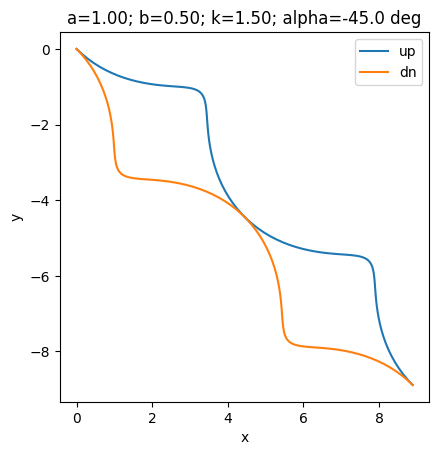

In [ ]:
deg = np.pi/180
A, B, K = 1.0, 0.5, 1.5
Alpha=-45*deg
plt.axes().set_aspect(1)
plt.plot(xuf(A,B,K,Alpha,phis),yuf(A,B,K,Alpha,phis), label="up")
plt.plot(xdf(A,B,K,Alpha,phis),ydf(A,B,K,Alpha,phis), label="dn")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"a={A:.2f}; b={B:.2f}; k={K:.2f}; alpha={Alpha/deg:.1f} deg")

In [ ]:
yd

-b*k*(1 - cos(2*\phi(t)))*cos(alpha) + (2*a*\phi(t) + b*sin(2*\phi(t)))*sin(alpha)

## 2. 운동방정식 유도

In [ ]:
xu_dot = sp.diff(xu,t)
yu_dot = sp.diff(yu,t)

xd_dot = sp.diff(xd,t)
yd_dot = sp.diff(yd,t)

In [ ]:
vxuf = sp.lambdify((a,b,k,alpha,phi,phidot),xu_dot)
vyuf = sp.lambdify((a,b,k,alpha,phi,phidot),yu_dot)
vxdf = sp.lambdify((a,b,k,alpha,phi,phidot),xd_dot)
vydf = sp.lambdify((a,b,k,alpha,phi,phidot),yd_dot)

운동에너지와 퍼텐셜 에너지

In [ ]:
Tu = sp.Rational(1,2)*m*(xu_dot**2+yu_dot**2)
Td = sp.Rational(1,2)*m*(xd_dot**2+yd_dot**2)
Uu = m*g*yu
Ud = m*g*yd


라그랑지안

In [ ]:
Lu = sp.simplify(Tu - Uu)
Ld = sp.simplify(Td - Ud)

In [ ]:
Lu

m*(g*(b*k*(cos(2*\phi(t)) - 1)*cos(alpha) - (2*a*\phi(t) + b*sin(2*\phi(t)))*sin(alpha)) + 2*(a**2 - 4*a*b*sin(\phi(t))**2 + 2*a*b - 4*b**2*k**2*sin(\phi(t))**4 + 4*b**2*k**2*sin(\phi(t))**2 + 4*b**2*sin(\phi(t))**4 - 4*b**2*sin(\phi(t))**2 + b**2)*Derivative(\phi(t), t)**2)

In [ ]:
Ld

m*(-g*(b*k*(cos(2*\phi(t)) - 1)*cos(alpha) + (2*a*\phi(t) + b*sin(2*\phi(t)))*sin(alpha)) + 2*(a**2 - 4*a*b*sin(\phi(t))**2 + 2*a*b - 4*b**2*k**2*sin(\phi(t))**4 + 4*b**2*k**2*sin(\phi(t))**2 + 4*b**2*sin(\phi(t))**4 - 4*b**2*sin(\phi(t))**2 + b**2)*Derivative(\phi(t), t)**2)

오일러-라그랑지 방정식(운동방정식) 유도:

In [ ]:
LEu = sp.diff(Lu,phi) - sp.diff(sp.diff(Lu,phidot),t)
LEd = sp.diff(Ld,phi) - sp.diff(sp.diff(Ld,phidot),t)

In [ ]:
LEu

m*(g*(-2*b*k*sin(2*\phi(t))*cos(alpha) - (2*a + 2*b*cos(2*\phi(t)))*sin(alpha)) + 2*(-8*a*b*sin(\phi(t))*cos(\phi(t)) - 16*b**2*k**2*sin(\phi(t))**3*cos(\phi(t)) + 8*b**2*k**2*sin(\phi(t))*cos(\phi(t)) + 16*b**2*sin(\phi(t))**3*cos(\phi(t)) - 8*b**2*sin(\phi(t))*cos(\phi(t)))*Derivative(\phi(t), t)**2) - 4*m*(-8*a*b*sin(\phi(t))*cos(\phi(t))*Derivative(\phi(t), t) - 16*b**2*k**2*sin(\phi(t))**3*cos(\phi(t))*Derivative(\phi(t), t) + 8*b**2*k**2*sin(\phi(t))*cos(\phi(t))*Derivative(\phi(t), t) + 16*b**2*sin(\phi(t))**3*cos(\phi(t))*Derivative(\phi(t), t) - 8*b**2*sin(\phi(t))*cos(\phi(t))*Derivative(\phi(t), t))*Derivative(\phi(t), t) - 4*m*(a**2 - 4*a*b*sin(\phi(t))**2 + 2*a*b - 4*b**2*k**2*sin(\phi(t))**4 + 4*b**2*k**2*sin(\phi(t))**2 + 4*b**2*sin(\phi(t))**4 - 4*b**2*sin(\phi(t))**2 + b**2)*Derivative(\phi(t), (t, 2))

In [ ]:
LEd

m*(-g*(-2*b*k*sin(2*\phi(t))*cos(alpha) + (2*a + 2*b*cos(2*\phi(t)))*sin(alpha)) + 2*(-8*a*b*sin(\phi(t))*cos(\phi(t)) - 16*b**2*k**2*sin(\phi(t))**3*cos(\phi(t)) + 8*b**2*k**2*sin(\phi(t))*cos(\phi(t)) + 16*b**2*sin(\phi(t))**3*cos(\phi(t)) - 8*b**2*sin(\phi(t))*cos(\phi(t)))*Derivative(\phi(t), t)**2) - 4*m*(-8*a*b*sin(\phi(t))*cos(\phi(t))*Derivative(\phi(t), t) - 16*b**2*k**2*sin(\phi(t))**3*cos(\phi(t))*Derivative(\phi(t), t) + 8*b**2*k**2*sin(\phi(t))*cos(\phi(t))*Derivative(\phi(t), t) + 16*b**2*sin(\phi(t))**3*cos(\phi(t))*Derivative(\phi(t), t) - 8*b**2*sin(\phi(t))*cos(\phi(t))*Derivative(\phi(t), t))*Derivative(\phi(t), t) - 4*m*(a**2 - 4*a*b*sin(\phi(t))**2 + 2*a*b - 4*b**2*k**2*sin(\phi(t))**4 + 4*b**2*k**2*sin(\phi(t))**2 + 4*b**2*sin(\phi(t))**4 - 4*b**2*sin(\phi(t))**2 + b**2)*Derivative(\phi(t), (t, 2))

수치 모의실험에 사용할 수 있는 형태로 변환:

In [ ]:
ddphiu = sp.solve(LEu,phiddot)[0]
ddphid = sp.solve(LEd,phiddot)[0]

In [ ]:
ddphiu

(2*a*b*sin(2*\phi(t))*Derivative(\phi(t), t)**2 - a*g*sin(alpha)/2 - b**2*k**2*sin(4*\phi(t))*Derivative(\phi(t), t)**2 + b**2*sin(4*\phi(t))*Derivative(\phi(t), t)**2 + b*g*k*sin(alpha - 2*\phi(t))/4 - b*g*k*sin(alpha + 2*\phi(t))/4 - b*g*sin(alpha - 2*\phi(t))/4 - b*g*sin(alpha + 2*\phi(t))/4)/(a**2 - 4*a*b*sin(\phi(t))**2 + 2*a*b - 4*b**2*k**2*sin(\phi(t))**4 + 4*b**2*k**2*sin(\phi(t))**2 + 4*b**2*sin(\phi(t))**4 - 4*b**2*sin(\phi(t))**2 + b**2)

In [ ]:
ddphid

(2*a*b*sin(2*\phi(t))*Derivative(\phi(t), t)**2 - a*g*sin(alpha)/2 - b**2*k**2*sin(4*\phi(t))*Derivative(\phi(t), t)**2 + b**2*sin(4*\phi(t))*Derivative(\phi(t), t)**2 - b*g*k*sin(alpha - 2*\phi(t))/4 + b*g*k*sin(alpha + 2*\phi(t))/4 - b*g*sin(alpha - 2*\phi(t))/4 - b*g*sin(alpha + 2*\phi(t))/4)/(a**2 - 4*a*b*sin(\phi(t))**2 + 2*a*b - 4*b**2*k**2*sin(\phi(t))**4 + 4*b**2*k**2*sin(\phi(t))**2 + 4*b**2*sin(\phi(t))**4 - 4*b**2*sin(\phi(t))**2 + b**2)

In [ ]:
ode1 = sp.lambdify(phidot, phidot)
ode2u = sp.lambdify((g, a, b, k, alpha, phi, phidot), ddphiu)
ode2d = sp.lambdify((g, a, b, k, alpha, phi, phidot), ddphid)

In [ ]:
deg=np.pi/180
ode2d(9.8,1,0.1,9.0,-30*deg,1.0, 0.0)

3.6649694049984576

In [ ]:
def dSudt(Su, t):
  phi = Su[0]
  phidot = Su[1]
  return ode1(phidot), ode2u(g, a, b, k, alpha, phi, phidot)

def dSddt(Sd, t):
  phi = Sd[0]
  phidot = Sd[1]
  return ode1(phidot), ode2d(g, a, b, k, alpha, phi, phidot)


## 3. 시뮬레이션 진행

Give concrete values for $a$, $b$, $k$, and $\alpha$ here.

In [ ]:
ts1 = np.linspace(0,2,100)
deg = np.pi/180
g=9.8

'''
Give concrete values for a, b, and alpha here
'''
a=1
b=0.5
k=1.5
alpha=-45*deg

"""
임의의 시간 동안 초벌 시뮬레이션 진행
"""
ans1 = odeint(dSddt, y0=[0,0], t=ts1)
ans2 = odeint(dSudt, y0=[0,0], t=ts1)

In [ ]:
"""
물체들이 P점을 지날 때까지 충분히 긴 시간동안 시뮬레이션이 진행되었는지 확인:
"""
evals = np.array(["Too short", "Okay"])
[evals[floor(p)] for p in (np.sign(np.array([ans[-1][0] for ans in [ans1, ans2]]) - np.pi)+1)/2]

['Okay', 'Okay']

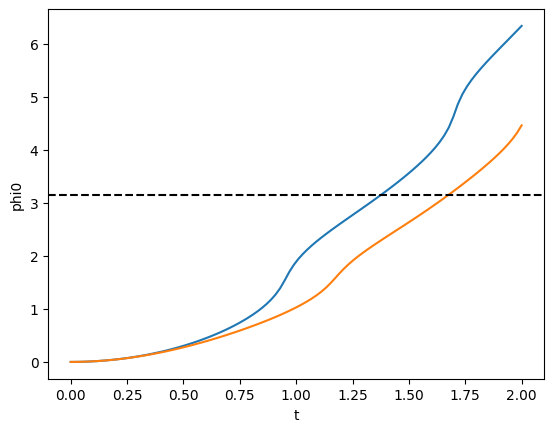

In [ ]:
plt.plot(ts1,ans1.T[0])
plt.plot(ts1,ans2.T[0])
plt.xlabel("t")
plt.ylabel("phi0")
plt.axhline(np.pi,color='black', linestyle='dashed')

In [ ]:
"""
초벌 시뮬레이션 결과를 다항식으로 근사
시간 t를 phi의 함수로 피팅하여
phi=pi(P점) 도달 시간을 쉽게 찾을 수 있도록 함.
피팅계수를 먼저 구한다:
"""
pf1 = np.polyfit(ans1.T[0],ts1,19)
pf2 = np.polyfit(ans2.T[0],ts1,19)

<ipython-input-39-67dab82fa67a>:7: RankWarning: Polyfit may be poorly conditioned
  pf1 = np.polyfit(ans1.T[0],ts1,19)
<ipython-input-39-67dab82fa67a>:8: RankWarning: Polyfit may be poorly conditioned
  pf2 = np.polyfit(ans2.T[0],ts1,19)


In [ ]:
"""
위의 피팅 계수로 피팅함수를 구한다.
"""
ffit1 = np.poly1d(pf1)
ffit2 = np.poly1d(pf2)
print(ffit1)
print(ffit2)

            19             18            17             16
-5.083e-08 x  + 2.662e-06 x  - 6.15e-05 x  + 0.0008079 x 
             15           14           13         12        11
 - 0.006291 x  + 0.02356 x  + 0.06125 x  - 1.441 x  + 10.2 x 
          10         9       8         7         6         5       4
 - 45.24 x  + 140.9 x - 319 x + 527.9 x - 632.8 x + 537.8 x - 313 x
          3         2
 + 118.9 x - 27.92 x + 4.508 x + 0.03604
            19            18           17          16         15
-4.233e-05 x  + 0.001528 x  - 0.02428 x  + 0.2188 x  - 1.159 x 
          14         13         12         11        10        9
 + 2.831 x  + 6.851 x  - 94.86 x  + 452.8 x  - 1372 x  + 2934 x
         8        7        6        5        4         3         2
 - 4570 x + 5221 x - 4336 x + 2564 x - 1044 x + 278.6 x - 46.08 x + 5.369 x + 0.02997


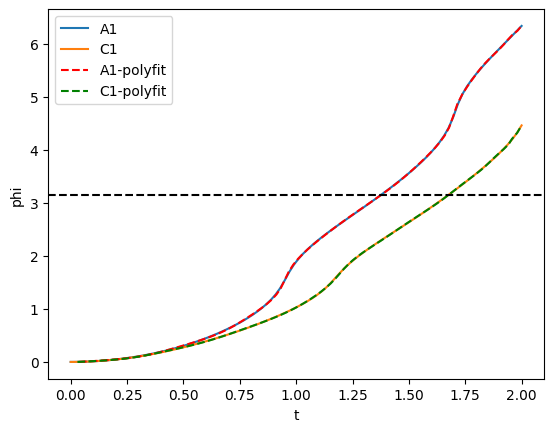

In [ ]:
"""
다항식 피팅 함수가 시뮬레이션 결과를 잘 반영하는지 시각적으로 확인
"""
plt.plot(ts1,ans1.T[0])
plt.plot(ts1,ans2.T[0])
plt.plot(ffit1(ans1.T[0]),ans1.T[0],"r--")
plt.plot(ffit2(ans2.T[0]),ans2.T[0],"g--")
plt.xlabel("t")
plt.ylabel("phi")
plt.legend(["A1","C1","A1-polyfit","C1-polyfit"])
plt.axhline(np.pi, color='black', ls='dashed')

In [ ]:
"""
AB, CD 의 P점 도달 시간
"""
tPAB = ffit1(np.pi)
tPCD = ffit2(np.pi)
print(tPAB)
print(tPCD)

1.3734885948678521
1.6725860595019508


In [ ]:
"""
P점 도달 시간까지 본 시뮬레이션을 1차 진행
"""
tsAB = np.linspace(0,tPAB,101)
tsCD = np.linspace(0,tPCD,101)
ansAB = odeint(dSddt, y0=[0,0], t=tsAB)
ansCD = odeint(dSudt, y0=[0,0], t=tsCD)

In [ ]:
"""
1차 시뮬레이션의 마지막 값이 phi=pi, 즉 P점을 가리키는 지 확인:
"""
print(ansAB[-1])
print(ansCD[-1])

[3.14449762 3.11272897]
[3.1433519  3.11187129]


In [ ]:
"""
1차 시뮬레이션의 마지막 값을 초깃값으로 삼아 2차 즉 P-Q구간 시뮬레이션을 초벌 진행
(시간 구간은 임의로 설정)
"""
tsA2 = np.linspace(tPAB,1.5*tPAB,100)
tsC2 = np.linspace(tPCD,1.5*tPCD,100)
ansA2 = odeint(dSddt, y0=ansAB[-1], t=tsA2)
ansB2 = odeint(dSudt, y0=ansAB[-1], t=tsA2)
ansC2 = odeint(dSddt, y0=ansCD[-1], t=tsC2)
ansD2 = odeint(dSudt, y0=ansCD[-1], t=tsC2)

In [ ]:
"""
물체들이 Q점을 지날 때까지 출분히 긴 시간동안 시뮬레이션이 진행되었는지 확인:
"""
[evals[floor(p)] for p in (np.sign(np.array([ans[-1][0] for ans in [ansA2, ansB2, ansC2, ansD2]]) - 2*np.pi)+1)/2]

['Okay', 'Okay', 'Okay', 'Okay']

In [ ]:
"""
2차 시뮬레이션 결과를 다항식으로 근사.
시간을 phi의 함수로 피팅하여 phi=2pi, 즉 Q점 도착시간을 찾기 편하게 함.
"""
pf3 = np.polyfit(ansA2.T[0],tsA2,20)
pf4 = np.polyfit(ansB2.T[0],tsA2,20)
pf5 = np.polyfit(ansC2.T[0],tsC2,20)
pf6 = np.polyfit(ansD2.T[0],tsC2,20)


<ipython-input-48-6bb410461306>:5: RankWarning: Polyfit may be poorly conditioned
  pf3 = np.polyfit(ansA2.T[0],tsA2,20)
<ipython-input-48-6bb410461306>:6: RankWarning: Polyfit may be poorly conditioned
  pf4 = np.polyfit(ansB2.T[0],tsA2,20)
<ipython-input-48-6bb410461306>:7: RankWarning: Polyfit may be poorly conditioned
  pf5 = np.polyfit(ansC2.T[0],tsC2,20)
<ipython-input-48-6bb410461306>:8: RankWarning: Polyfit may be poorly conditioned
  pf6 = np.polyfit(ansD2.T[0],tsC2,20)


In [ ]:
"""
피팅 계수로부터 다항 함수를 만든다.
"""
ffit3 = np.poly1d(pf3)
ffit4 = np.poly1d(pf4)
ffit5 = np.poly1d(pf5)
ffit6 = np.poly1d(pf6)

In [ ]:
"""
피팅한 다항 함수로부터 A~D 각각의 Q점 도달 시간을 구한다:
"""
tQA = ffit3(2*np.pi)
tQB = ffit4(2*np.pi)
tQC = ffit5(2*np.pi)
tQD = ffit6(2*np.pi)


In [ ]:
"""
A~D 각각 Q점 도달시까지 2차 본 시뮬레이션 진행
"""
tsA2 = np.linspace(tPAB,tQA,100)
tsB2 = np.linspace(tPAB,tQB,100)
tsC2 = np.linspace(tPCD,tQC,100)
tsD2 = np.linspace(tPCD,tQD,100)
ansA2 = odeint(dSddt, y0=ansAB[-1], t=tsA2)
ansB2 = odeint(dSudt, y0=ansAB[-1], t=tsB2)
ansC2 = odeint(dSddt, y0=ansCD[-1], t=tsC2)
ansD2 = odeint(dSudt, y0=ansCD[-1], t=tsD2)

## 4. 결과 분석

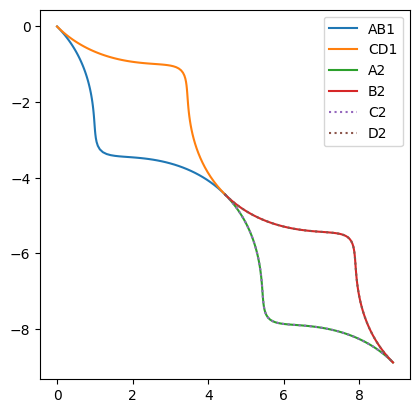

In [ ]:
"""
A~D각각의 전체 경로:
"""
plt.axes().set_aspect(1) # 가로:세로 비율을 같은 척도로 지정한다.
plt.plot(xdf(a,b,k,alpha,ansAB.T[0]),ydf(a,b,k,alpha,ansAB.T[0]),label='AB1')
plt.plot(xuf(a,b,k,alpha,ansCD.T[0]),yuf(a,b,k,alpha,ansCD.T[0]),label='CD1')
plt.plot(xdf(a,b,k,alpha,ansA2.T[0]),ydf(a,b,k,alpha,ansA2.T[0]),label='A2')
plt.plot(xuf(a,b,k,alpha,ansB2.T[0]),yuf(a,b,k,alpha,ansB2.T[0]),label='B2')
plt.plot(xdf(a,b,k,alpha,ansC2.T[0]),ydf(a,b,k,alpha,ansC2.T[0]),":",label='C2')
plt.plot(xuf(a,b,k,alpha,ansD2.T[0]),yuf(a,b,k,alpha,ansD2.T[0]),":",label='D2')
plt.legend()

In [ ]:
"""
phi와 phidot 값으로부터 속력을 계산하는 함수
"""

def getv(simans,profile="up"):
  match profile:
    case "up":
      vxf = vxuf
      vyf = vyuf
    case "dn":
      vxf = vxdf
      vyf = vydf
  vx = vxf(a,b,k,alpha,simans.T[0],simans.T[1])
  vy = vyf(a,b,k,alpha,simans.T[0],simans.T[1])
  v = np.sqrt(vx**2 + vy**2)
  return v

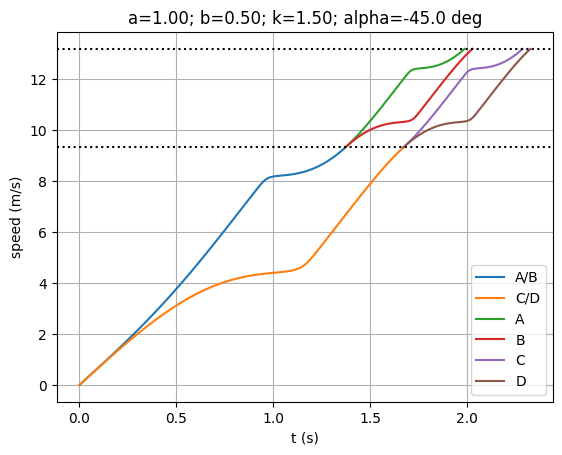

In [ ]:
"""
A~D 각각의 구간별 속력
"""
vA1 = getv(ansAB,profile="dn")
vC1 = getv(ansCD,profile="up")
vA2 = getv(ansA2,profile="dn")
vB2 = getv(ansB2,profile="up")
vC2 = getv(ansC2,profile="dn")
vD2 = getv(ansD2,profile="up")

"""
A~D 각각의 시간에 대한 속력 그래프:
"""
plt.plot(tsAB, vA1, label="A/B")
plt.plot(tsCD, vC1, label="C/D")
plt.plot(tsA2, vA2, label="A")
plt.plot(tsB2, vB2, label="B")
plt.plot(tsC2, vC2, label="C")
plt.plot(tsD2, vD2, label="D")

plt.legend()
plt.title(f"a={a:.2f}; b={b:.2f}; k={k:.2f}; alpha={alpha/deg:.1f} deg")
plt.grid()
plt.xlabel("t (s)")
plt.ylabel("speed (m/s)")
plt.axhline(vC1[-1],c='black',ls='dotted')
plt.axhline(vD2[-1],c='black',ls='dotted')

In [ ]:
t1 = t3 = tPAB
t5 = t7 = tPCD
t2 = tQA - tPAB
t4 = tQB - tPAB
t6 = tQC - tPCD
t8 = tQD - tPCD

$$ \dfrac{t_5 \times t_6 \times t_7 \times t_8}{t_1 \times t_2 \times t_3 \times t_4}$$

In [ ]:
(t5*t6*t7*t8)/(t1*t2*t3*t4)

1.4849684135616297

$$ \dfrac{t_2 \times t_4 \times t_6 \times t_8}{t_1 \times t_3 \times t_5 \times t_7}$$

In [ ]:
(t2*t4*t6*t8)/(t1*t3*t5*t7)

0.030461665650666225